# PART A

### 1. Data import and Understanding

A. Read the ‘Signals.csv’ as DataFrame and import required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
sd = pd.read_csv('/content/drive/MyDrive/AIML Course/Introduction to Neural Networks/Part-+1%2C2%263+-+Signal.csv')

In [18]:
sd.shape

(1599, 12)

In [19]:
sd.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
sd.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [21]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
import tensorflow as tf
import random
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import initializers
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import random
from tensorflow.keras import backend

B. Check for missing values and print percentage for each attribute

In [23]:
round(sd.isnull().sum() / sd.isnull().count() * 100, 2)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [24]:
sd.isnull().values.any()

False

In [45]:
#No missing values found in the dataset

C. Check for presence of duplicate records in the dataset and impute with appropriate method

In [25]:
sd_duplicates = sd.duplicated()
print('Number of duplicates:', sd_duplicates.sum())

Number of duplicates: 240


In [26]:
from scipy.stats import skew

# calculating skewness of each column
sd_sk = sd.skew()

# print the skewness of each column
print(sd_sk)

Parameter 1        0.982751
Parameter 2        0.671593
Parameter 3        0.318337
Parameter 4        4.540655
Parameter 5        5.680347
Parameter 6        1.250567
Parameter 7        1.515531
Parameter 8        0.071288
Parameter 9        0.193683
Parameter 10       2.428672
Parameter 11       0.860829
Signal_Strength    0.217802
dtype: float64


In [40]:
# As we find all the data are positively skewed, imputing the dataset with median to check if we could minimize duplicates
for column in sd.columns:
    sd[column].fillna(sd[column].mean(), inplace=True)

In [41]:
# calculating skewness of each column
sd_sk = sd.skew()

# print the skewness of each column
print(sd_sk)

Parameter 1        0.982751
Parameter 2        0.671593
Parameter 3        0.318337
Parameter 4        4.540655
Parameter 5        5.680347
Parameter 6        1.250567
Parameter 7        1.515531
Parameter 8        0.071288
Parameter 9        0.193683
Parameter 10       2.428672
Parameter 11       0.860829
Signal_Strength    0.217802
dtype: float64


In [42]:
#As we did not see any imporvement with median imputation, droppign the duplicates into a new dataframe
sd.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [43]:
sd_dedup=sd.drop_duplicates()

In [44]:
sd_dedup.value_counts()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  Signal_Strength
4.6          0.52         0.15         2.1          0.054        8.0          65.0         0.99340      3.90         0.56          13.1          4                  1
8.8          0.24         0.54         2.5          0.083        25.0         57.0         0.99830      3.39         0.54          9.2           5                  1
             0.41         0.64         2.2          0.093        9.0          42.0         0.99860      3.54         0.66          10.5          5                  1
             0.40         0.40         2.2          0.079        19.0         52.0         0.99800      3.44         0.64          9.2           5                  1
             0.37         0.48         2.1          0.097        39.0         145.0        0.99750      3.04         1.03          9.3           5                  1
         

### D. Visualise distribution of the target variable.

In [46]:
sd_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


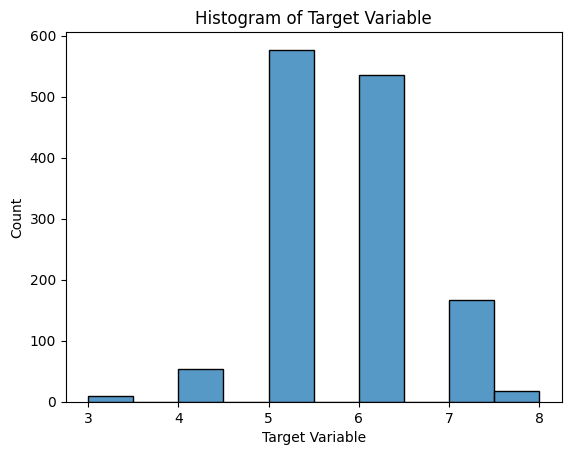

In [47]:
# y is tharget variable created for signal strengt in the dataframe
y = sd_dedup['Signal_Strength']

# Creating a histogram of the target variable
sns.histplot(y, kde=False, bins=10)
plt.title('Histogram of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

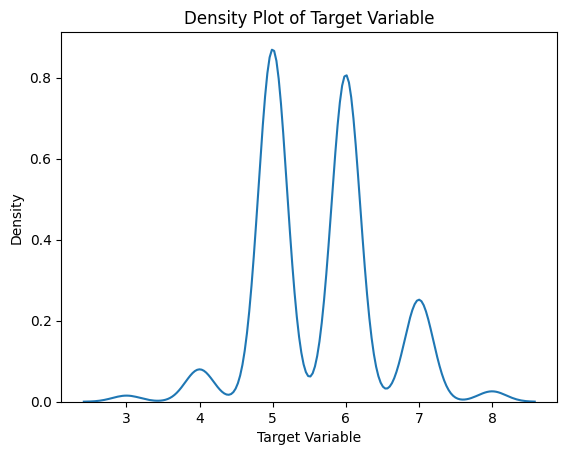

In [48]:
# Create a density plot of the target variable
sns.kdeplot(y)
plt.title('Density Plot of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.show()

In [53]:
#Signal strength 5 and 6 has been showing the best results of all the 11 parameters measured

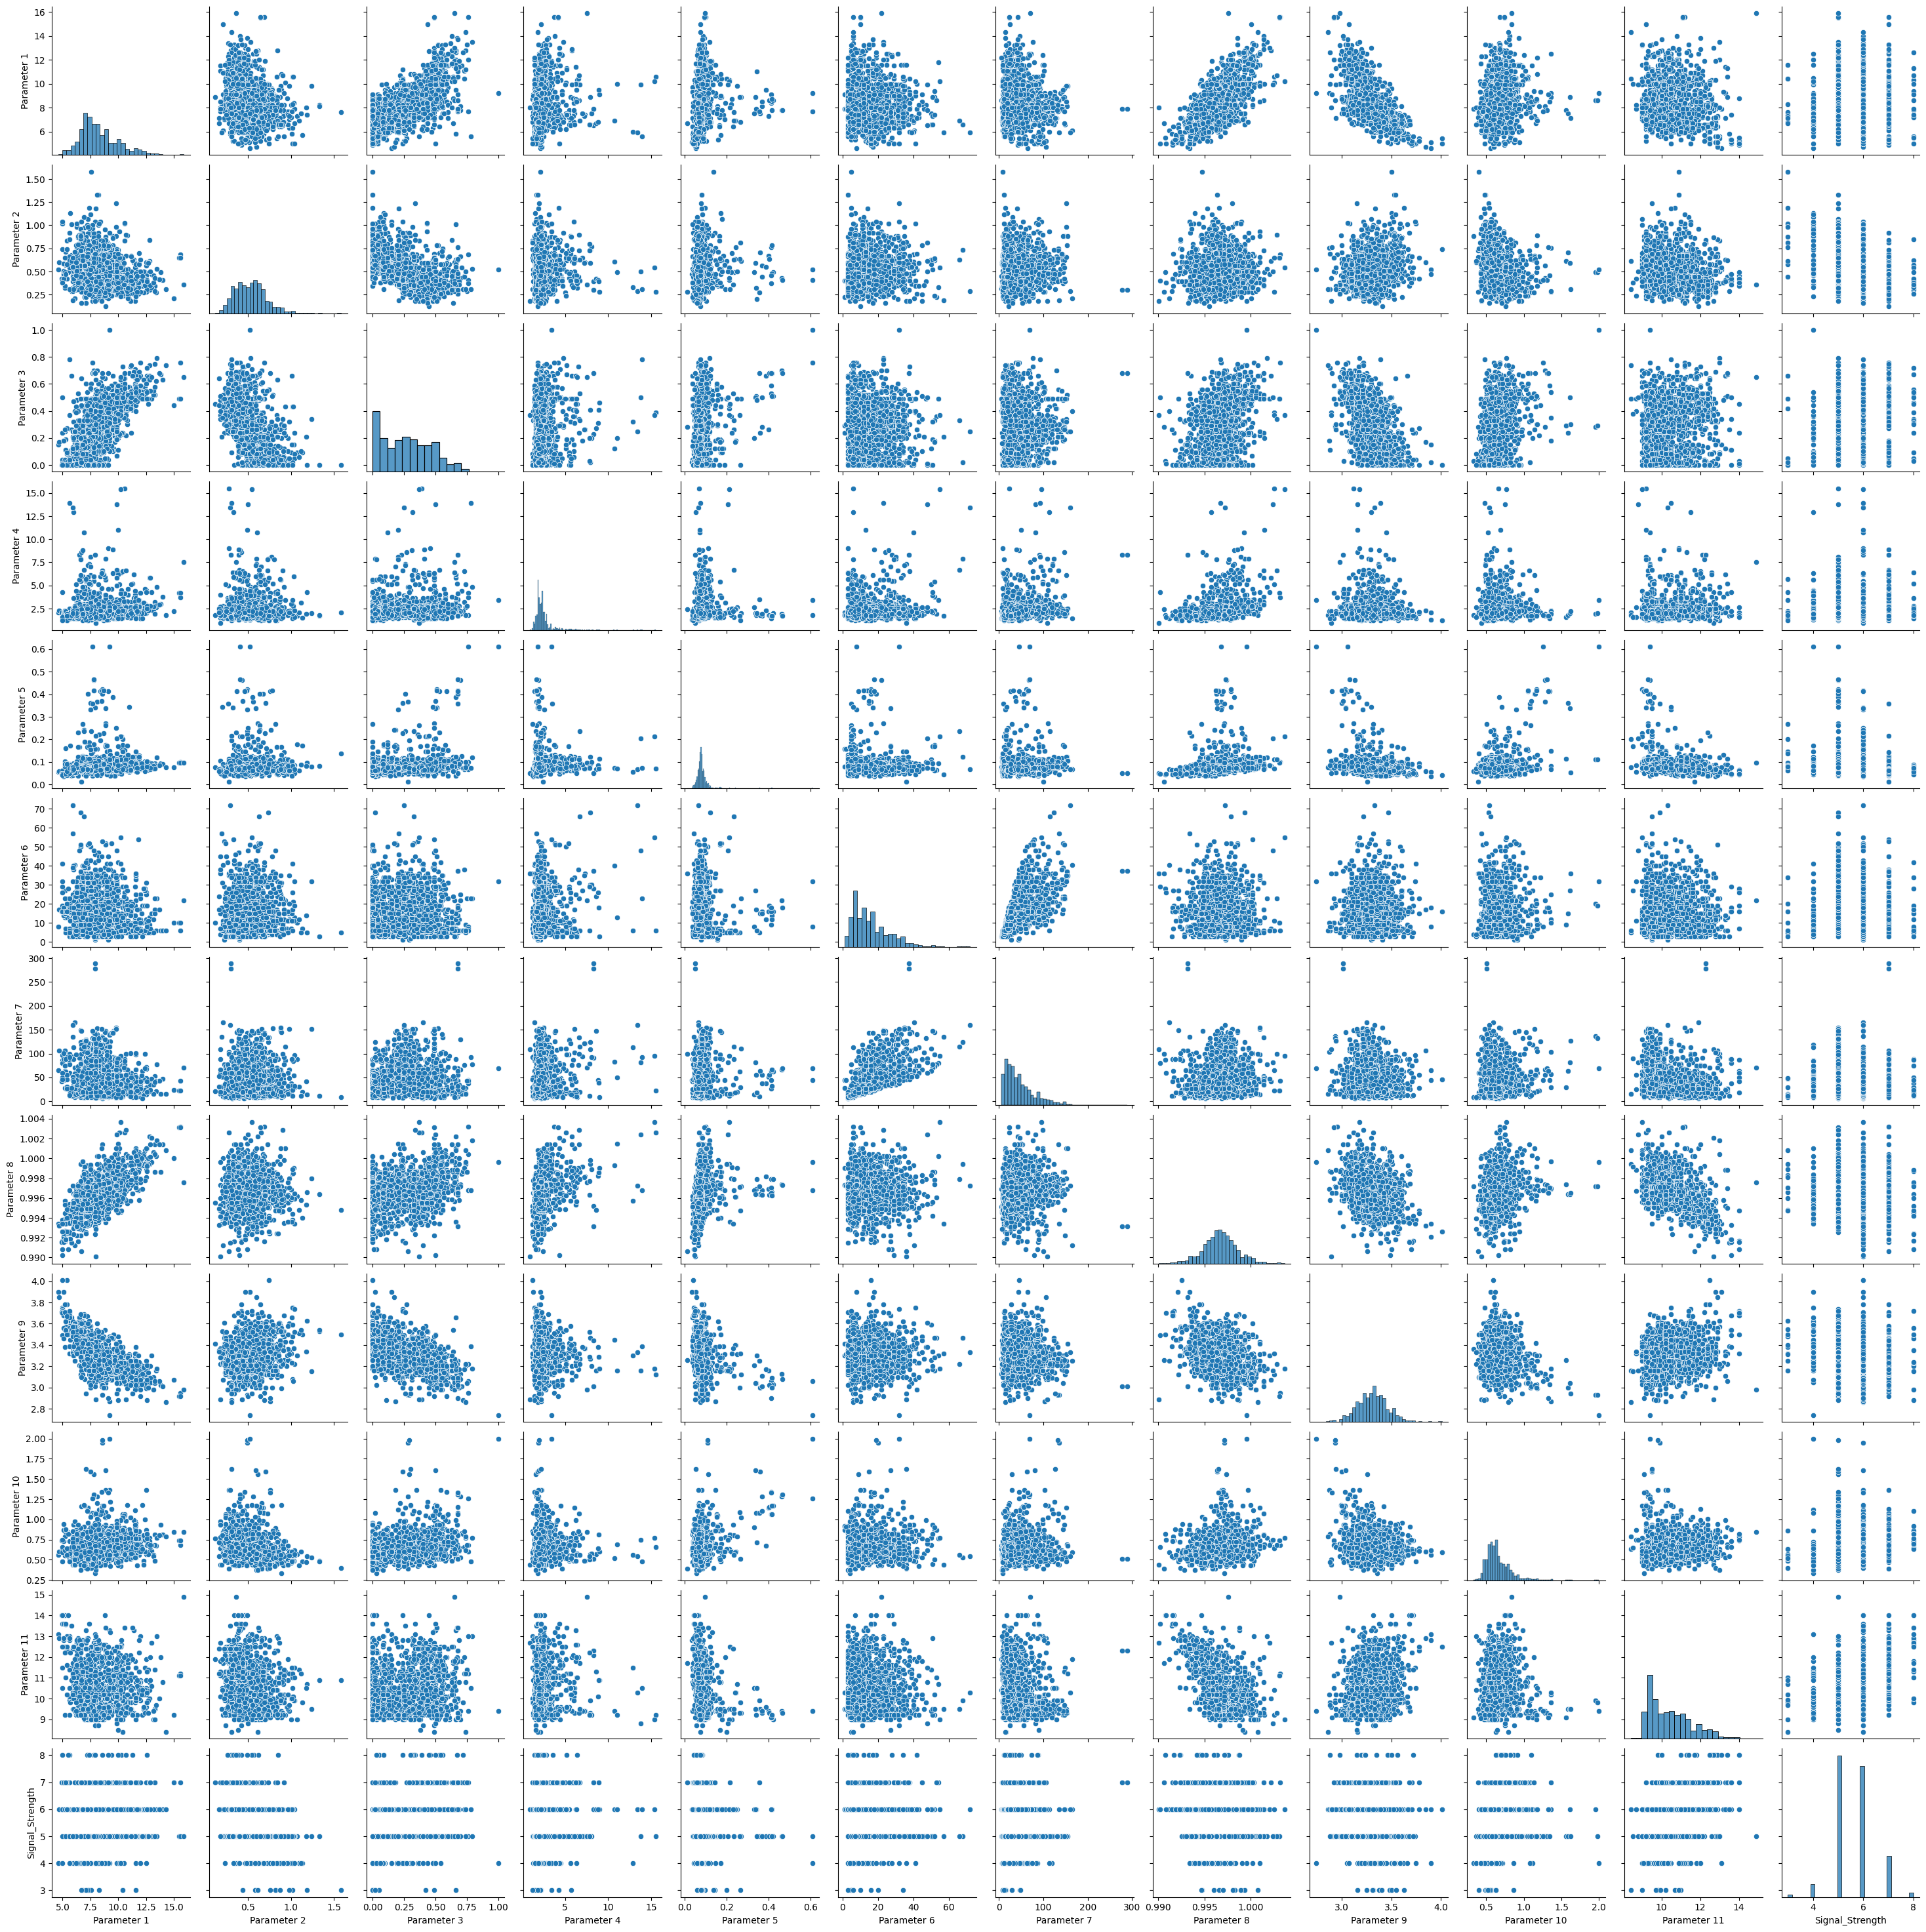

In [52]:
# Create a pair plot of the predictor variables and the target variable
x=sd_dedup.iloc[:,:-1]
sns.pairplot(pd.concat([x, y], axis=1))

In [54]:
#Parameter 1 & 8 are positively correlated
#Parameter 1 & 9 are negatively correlated

E. Share insights from the initial data analysis (at least 2).

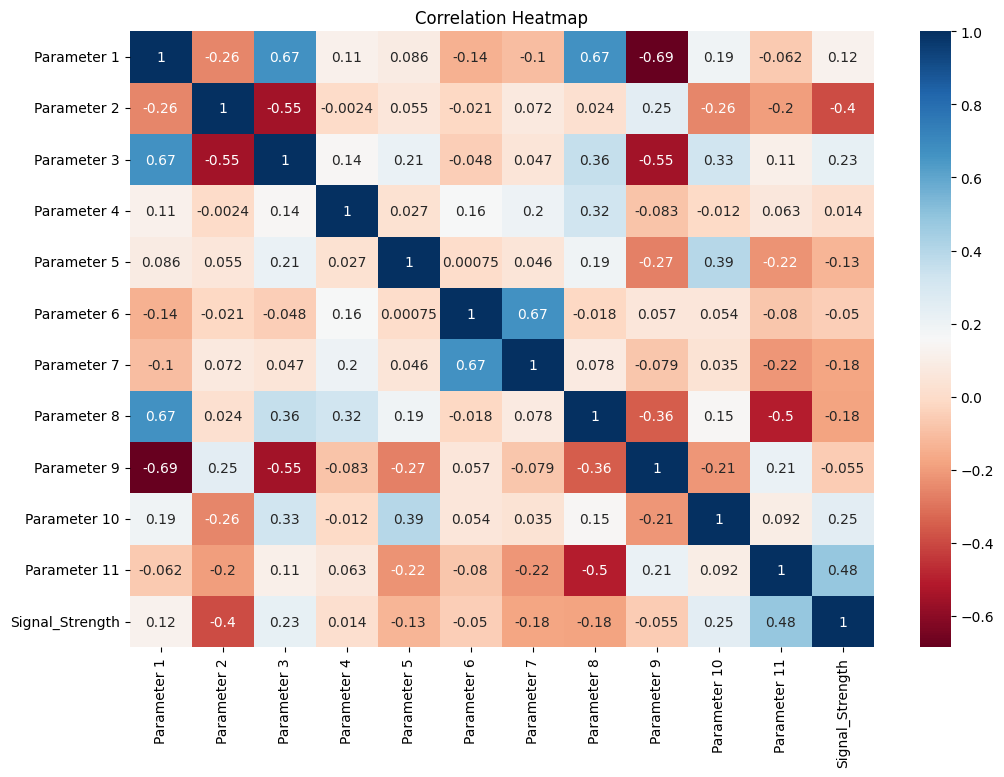

In [56]:
# Compute the correlation matrix
sd_dedup_corr = sd_dedup.corr()

# Set the figure size
plt.subplots(figsize=(12, 8))

# Visualize the correlation matrix as a heatmap
sns.heatmap(sd_dedup_corr, cmap='RdBu', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [57]:
#Parameter 9 is negatively skewed to parameter 1 with highest value of 0.69
#Paramter 3 & 8 are positively skewed to Parameter 1
#Parameter 6 is also positively skewed to Parameter 7
# Both the above said positive correlation have highest values of 0.67

# 2. Data preprocessing

A. Split the data into X & Y.

In [58]:
x

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [138]:
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

In [60]:
x.shape

(1359, 11)

In [62]:
y.shape

(1359,)

In [139]:
# Converting y to catergorical
yc=to_categorical(y,num_classes=12)

B. Split the data into train & test with 70:30 proportion.

In [140]:
from sklearn.model_selection import train_test_split

# X represents the feature variables, y represents the target variable
x_train, x_test, y_train, y_test = train_test_split(x, yc, test_size=0.3, random_state=42)

C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [141]:
# Print the shape of the four variables
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Verify if train and test data are in sync
assert x_train.shape[0] == y_train.shape[0], "Error: x_train and y_train have different number of samples"
assert x_test.shape[0] == y_test.shape[0], "Error: x_test and y_test have different number of samples"

x_train shape: (951, 11)
x_test shape: (408, 11)
y_train shape: (951, 12)
y_test shape: (408, 12)


D. Normalise the train and test data with appropriate method

In [142]:
x_train.min()

Parameter 1     4.60000
Parameter 2     0.16000
Parameter 3     0.00000
Parameter 4     0.90000
Parameter 5     0.01200
Parameter 6     2.00000
Parameter 7     6.00000
Parameter 8     0.99007
Parameter 9     2.86000
Parameter 10    0.33000
Parameter 11    8.40000
dtype: float64

In [143]:
x_train.max()

Parameter 1      15.9000
Parameter 2       1.5800
Parameter 3       0.7800
Parameter 4      13.9000
Parameter 5       0.6110
Parameter 6      72.0000
Parameter 7     289.0000
Parameter 8       1.0032
Parameter 9       3.9000
Parameter 10      1.9800
Parameter 11     14.9000
dtype: float64

In [148]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
sd_scaler = MinMaxScaler()

# Fit the scaler object on the training data
sd_scaler.fit(x_train)

# Transform the training and testing data using the scaler object
x_train_norm = sd_scaler.transform(x_train)
x_test_norm = sd_scaler.transform(x_test)

In [149]:
x_train_norm.min()

0.0

In [150]:
x_train_norm.max()

1.0000000000000002

In [151]:
x_test_norm.min()

-0.11538461538461497

In [152]:
x_test_norm.max()

1.282051282051282

E. Transform Labels into format acceptable by Neural Network

In [153]:
print(y_train.shape)
print(y_test.shape)

(951, 12)
(408, 12)


## 3. Model Training & Evaluation using Neural Network

### A. Design a Neural Network to train a classifier

In [163]:
sd_cls_model = Sequential()
sd_cls_model.add(Dense(8, activation='tanh'))
sd_cls_model.add(Dense(10, activation='tanh'))
sd_cls_model.add(Dense(12, activation='sigmoid'))

In [164]:
# Compile the model
sd_cls_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

### B. Train the classifier using previously designed Architecture

In [165]:
# Fit the model
history=sd_cls_model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
48/48 [==============================] - 1s 7ms/step - loss: 2.3254 - accuracy: 0.0431 - val_loss: 1.9616 - val_accuracy: 0.4510
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 1.7661 - accuracy: 0.4595 - val_loss: 1.5556 - val_accuracy: 0.4828
Epoch 3/50
48/48 [==============================] - 0s 4ms/step - loss: 1.4755 - accuracy: 0.4911 - val_loss: 1.3650 - val_accuracy: 0.5000
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 1.3436 - accuracy: 0.4974 - val_loss: 1.2802 - val_accuracy: 0.4926
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 1.2830 - accuracy: 0.4932 - val_loss: 1.2310 - val_accuracy: 0.5123
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 1.2483 - accuracy: 0.5005 - val_loss: 1.2067 - val_accuracy: 0.5074
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 1.2281 - accuracy: 0.4911 - val_loss: 1.1957 - val_accuracy: 0.4828
Epoch 8/50
48/48 [==

## C. Plot 2 separate visuals. 
i. Training Loss and Validation Loss

ii. Training Accuracy and Validation Accuracy

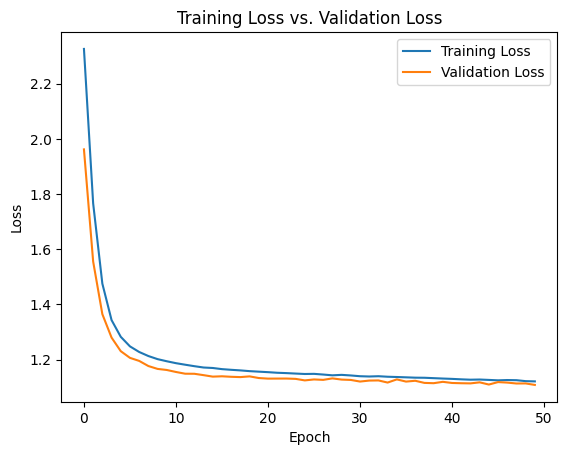

In [166]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

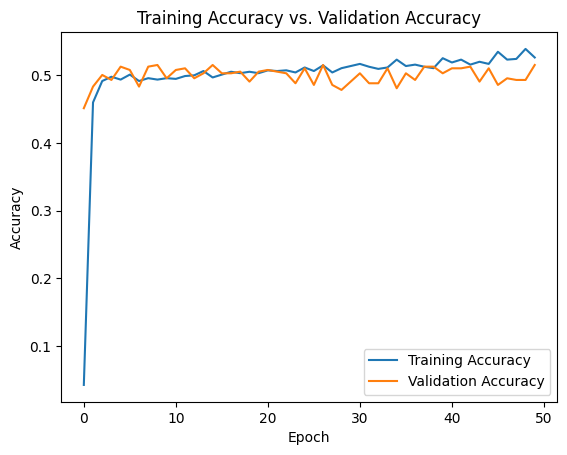

In [167]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

### D. Design new architecture/update existing architecture in attempt to improve the performance of the model

In [184]:
#Adding batch normalization and dropout after each dense layer except eh output layer to imporve performance of the model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

sd_cls_model_v1 = Sequential()
sd_cls_model_v1.add(Dense(128, activation='relu'))
sd_cls_model_v1.add(BatchNormalization())
sd_cls_model_v1.add(Dropout(0.2))
sd_cls_model_v1.add(Dense(64, activation='relu'))
sd_cls_model_v1.add(BatchNormalization())
sd_cls_model_v1.add(Dropout(0.2))
sd_cls_model_v1.add(Dense(32, activation='relu'))
sd_cls_model_v1.add(BatchNormalization())
sd_cls_model_v1.add(Dropout(0.2))
sd_cls_model_v1.add(Dense(16, activation='relu'))
sd_cls_model_v1.add(BatchNormalization())
sd_cls_model_v1.add(Dropout(0.2))
sd_cls_model_v1.add(Dense(12, activation='softmax'))
# Compile the model
sd_cls_model_v1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

In [185]:
# Fit the model
history_v1=sd_cls_model_v1.fit(x_train, y_train, batch_size=24, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
40/40 [==============================] - 2s 12ms/step - loss: 2.9542 - accuracy: 0.0715 - val_loss: 2.4001 - val_accuracy: 0.0196
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 2.5906 - accuracy: 0.1272 - val_loss: 2.1936 - val_accuracy: 0.3775
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 2.3475 - accuracy: 0.2156 - val_loss: 2.0636 - val_accuracy: 0.4583
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 2.0819 - accuracy: 0.3239 - val_loss: 1.8929 - val_accuracy: 0.4828
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 1.9669 - accuracy: 0.3586 - val_loss: 1.6899 - val_accuracy: 0.5147
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 1.8525 - accuracy: 0.4206 - val_loss: 1.6652 - val_accuracy: 0.5196
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 1.7433 - accuracy: 0.4479 - val_loss: 1.5482 - val_accuracy: 0.5098
Epoch 8/100


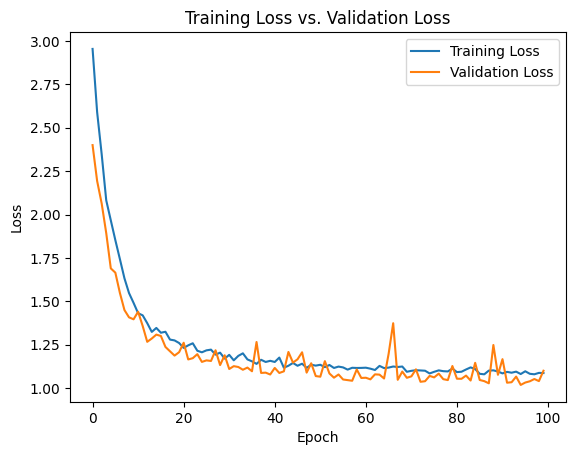

In [187]:
# Plot the training and validation loss
plt.plot(history_v1.history['loss'])
plt.plot(history_v1.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

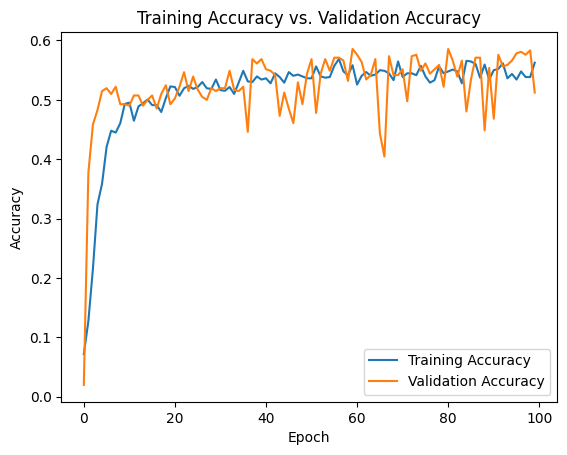

In [188]:
# Plot the training and validation accuracy
plt.plot(history_v1.history['accuracy'])
plt.plot(history_v1.history['val_accuracy'])
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [223]:
#The above model provided a slightly better accuracy.
#However, adding more dense layers, with less filters to improve accuracy
sd_cls_model_v2 = Sequential()

sd_cls_model_v2.add(Dense(32, activation='relu'))
sd_cls_model_v2.add(BatchNormalization())
sd_cls_model_v2.add(Dropout(0.2))
sd_cls_model_v2.add(Dense(28, activation='relu'))
sd_cls_model_v2.add(BatchNormalization())
sd_cls_model_v2.add(Dropout(0.2))
sd_cls_model_v2.add(Dense(24, activation='relu'))
sd_cls_model_v2.add(BatchNormalization())
sd_cls_model_v2.add(Dropout(0.2))
sd_cls_model_v2.add(Dense(12, activation='sigmoid'))
# Compile the model
sd_cls_model_v2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

Adding more epochs from 100 to 250 to imporve accuracy further

In [224]:
# Fit the model
history_v2=sd_cls_model_v2.fit(x_train, y_train, batch_size=24, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
40/40 [==============================] - 17s 11ms/step - loss: 2.9911 - accuracy: 0.0736 - val_loss: 2.5458 - val_accuracy: 0.0466
Epoch 2/250
40/40 [==============================] - 0s 4ms/step - loss: 2.5882 - accuracy: 0.1598 - val_loss: 2.1544 - val_accuracy: 0.4804
Epoch 3/250
40/40 [==============================] - 0s 5ms/step - loss: 2.2925 - accuracy: 0.2671 - val_loss: 1.9656 - val_accuracy: 0.5147
Epoch 4/250
40/40 [==============================] - 0s 5ms/step - loss: 2.1127 - accuracy: 0.3596 - val_loss: 1.8172 - val_accuracy: 0.5539
Epoch 5/250
40/40 [==============================] - 0s 5ms/step - loss: 1.9774 - accuracy: 0.3996 - val_loss: 1.6926 - val_accuracy: 0.5221
Epoch 6/250
40/40 [==============================] - 0s 5ms/step - loss: 1.8435 - accuracy: 0.4385 - val_loss: 1.5853 - val_accuracy: 0.5049
Epoch 7/250
40/40 [==============================] - 0s 5ms/step - loss: 1.6772 - accuracy: 0.4763 - val_loss: 1.4850 - val_accuracy: 0.5098
Epoch 8/250

### E. Plot visuals as in Q3.C and share insights about difference observed in both the models

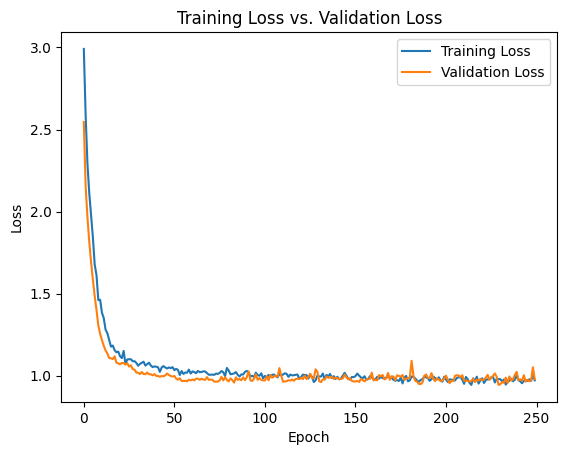

In [225]:
# Plot the training and validation loss
plt.plot(history_v2.history['loss'])
plt.plot(history_v2.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

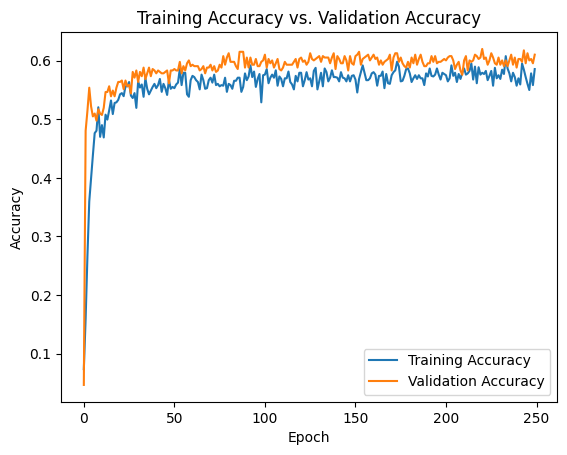

In [226]:
# Plot the training and validation accuracy
plt.plot(history_v2.history['accuracy'])
plt.plot(history_v2.history['val_accuracy'])
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In the first model(sd_cls_model), 2 dense layers with tanh activation & sigmoid was used in output layer. Adam was used as optimizer. The accuracy was ranging about 50%

In the next model(sd_cls_model_v1), 4 dense layers were used with relu activation function. Softmax was used as activation function in the output layer. Due to introduction of droput, noise was induced in the layer. SGD was used as optimizer. However, the accuracy has mrginaly improved from previous result.

In the final model(sd_cls_model_v2), 3 dense layers were used with relu as activation function. Output layer used sigmoid activation fucntion. Adam optimizer was used. Number of epochs increased from 100 to 250. This provide better accuracy of about 60% compared to the aboe  models.

# PART B

### 1. Data Import and Exploration

A. Read the .h5 file and assign to a variable

In [2]:
import io
import h5py

path = '/content/drive/My Drive/AIML Course/Introduction to Neural Networks/'

In [3]:
# Open the file as readonly
h5f = h5py.File(path + 'Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

B. Print all the keys from the .h5 file

In [33]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

C. Split the data into X_train, X_test, Y_train, Y_test

In [34]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

## 2. Data Visualisation and preprocessing

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

In [35]:
print('X_train' ,X_train.shape)
print('y_train' ,y_train.shape)
print('X_test' ,X_test.shape)
print('y_test' ,y_test.shape)

X_train (42000, 32, 32)
y_train (42000,)
X_test (18000, 32, 32)
y_test (18000,)


B. Visualise first 10 images in train data and print its corresponding labels

6   7   4   4   0   3   0   7   3   1   
0   1   3   1   1   0   0   8   4   6   
5   7   9   1   0   3   0   7   2   1   
1   0   2   9   0   2   5   1   3   2   
7   9   8   4   9   4   5   9   3   4   
0   5   5   8   3   6   6   0   0   6   
8   8   3   1   4   7   0   2   9   4   
8   7   3   9   4   4   3   3   4   4   
8   6   8   7   4   0   4   4   4   1   
4   2   7   4   2   9   1   9   1   0   


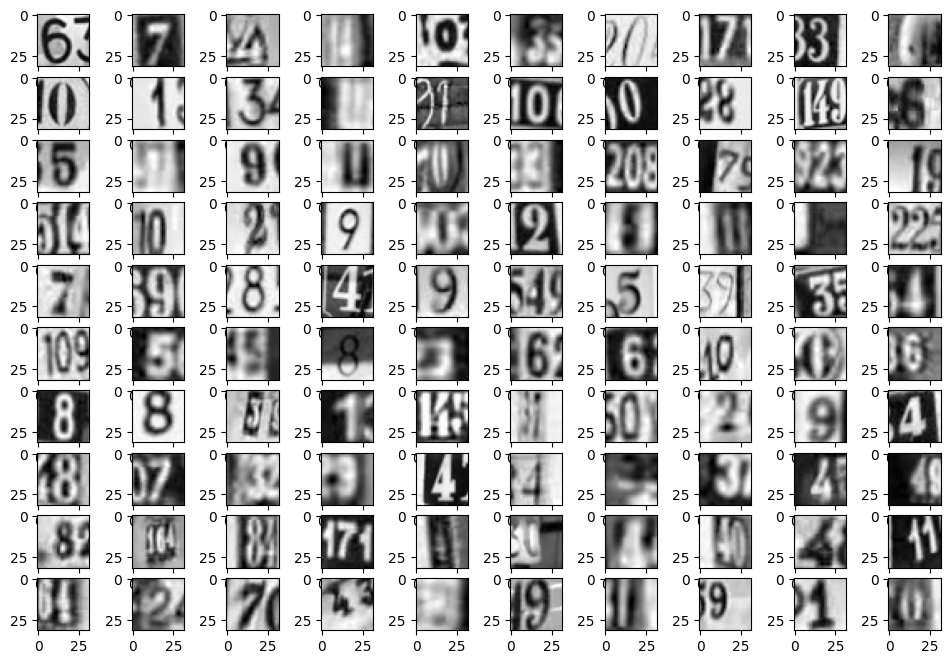

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

columns=10
rows=10

fig=plt.figure(figsize=(12, 8))

for i in range(1,columns*rows+1):
  img=X_train[i]
  fig.add_subplot(rows,columns,i)
  print(y_train[i],end='   ')
  if i % columns == 0:
    print ("")
  plt.imshow(img,cmap='gray')

plt.show()

C. Reshape all the images with appropriate shape update the data in same variable

In [36]:
X_train.shape

(42000, 32, 32)

In [37]:
#Reshaping train and test data from 3d to 2d numpy array
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [16]:
X_test.shape

(18000, 1024)

In [38]:
print("X_train",X_train.shape," X_test", X_test.shape)

X_train (42000, 1024)  X_test (18000, 1024)


D. Normalise the images i.e. Normalise the pixel values

In [39]:
# converting the images from ..input/>.h5 file to numpy array
data = np.array(h5f)
test_x = np.array(h5f['X_test'])
train_x = np.array(h5f['X_train'])
test_y = np.array(h5f['y_test'])
train_y = np.array(h5f['y_train'])

In [40]:
# Cheking type of converted array
print(type(test_x))
print(type(train_x))
print(type(test_y))
print(type(train_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
# use min-max scaler to normalise the pixel values (make max value as 1 and min value as 0)
scale_minmax=MinMaxScaler()

train_x=scale_minmax.fit_transform(train_x.reshape(-1,train_x.shape[-1])).reshape(train_x.shape)
test_x=scale_minmax.transform(test_x.reshape(-1,test_x.shape[-1])).reshape(test_x.shape)

In [42]:
# Checking Lowest and Highest Pixel Value after normalization of images
print("Lowest Pixel Value:", train_x[0].min(),"Highest Pixel Value:", train_x[0].max())

Lowest Pixel Value: 0.049835496 Highest Pixel Value: 0.51063794


2.E. Transform Labels into format acceptable by Neural Network

In [43]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [44]:
print('y_train',y_train.shape, 'y_test',y_test.shape)

y_train (42000, 10) y_test (18000, 10)


2.F. Print total Number of classes in the Dataset




In [47]:
num_classes = len(np.unique(train_y))

print("Number of classes:", num_classes)

Number of classes: 10


In [46]:
train_y.shape

(42000,)

## 3. Model Training & Evaluation using Neural Network

A. Design a Neural Network to train a classifier

In [79]:
train_x_flat = train_x.reshape(X_train.shape[0], -1)
test_x_flat = test_x.reshape(X_test.shape[0], -1)

In [81]:
test_x_flat.shape

(18000, 1024)

In [85]:
train_x_flat.shape

(42000, 1024)

In [96]:
model_cls = Sequential()
model_cls.add(Dense(32, input_shape=(1024,)))                  
model_cls.add(Activation('relu'))    
model_cls.add(Dense(16))                   
model_cls.add(Activation('relu'))    
model_cls.add(Dense(16))                   
model_cls.add(Activation('relu'))    
model_cls.add(Dense(16))                    
model_cls.add(Activation('relu'))    
model_cls.add(Dense(10))
model_cls.add(Activation('softmax'))
    
sgd = optimizers.SGD(learning_rate = 0.001)
model_cls.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

B. Train the classifier using previously designed Architecture (Use best suitable parameters).

In [97]:
hist_cl_hi5=model_cls.fit(train_x_flat,y_train,batch_size=20,epochs=50,verbose=0,validation_data=(test_x_flat,y_test))

C. Evaluate performance of the model with appropriate metrics.

In [98]:
result_cls = model_cls.evaluate(test_x_flat,y_test)

563/563 [==============================] - 1s 2ms/step - loss: 1.0585 - accuracy: 0.6723


In [99]:
result_cls_train_acc = model_cls.evaluate(train_x_flat,y_train)

1313/1313 [==============================] - 2s 2ms/step - loss: 1.0150 - accuracy: 0.6833


D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same

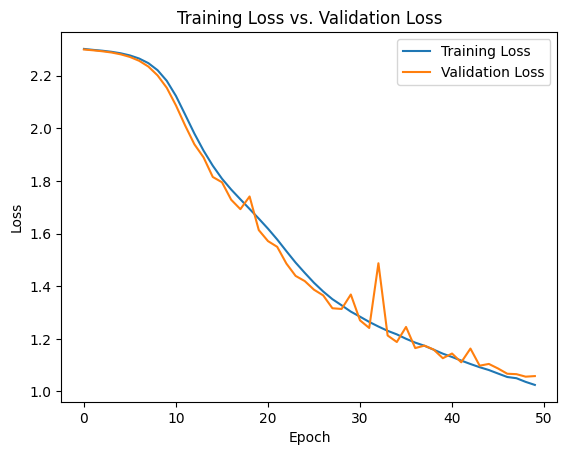

In [106]:
# Plot the training and validation loss
plt.plot(hist_cl_hi5.history['loss'])
plt.plot(hist_cl_hi5.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

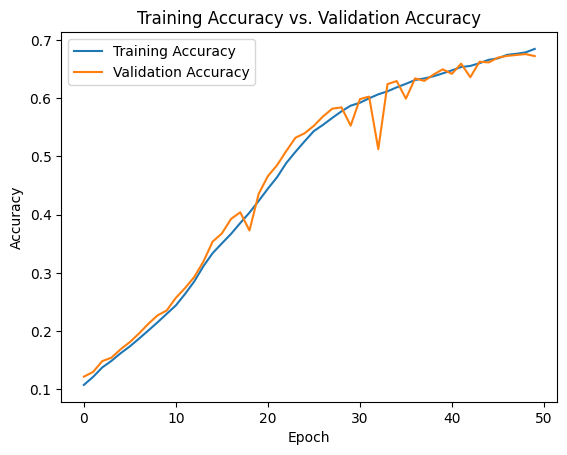

In [107]:
# Plot the training and validation accuracy
plt.plot(hist_cl_hi5.history['accuracy'])
plt.plot(hist_cl_hi5.history['val_accuracy'])
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [108]:
hist_cl_hi5_v1=model_cls.fit(train_x_flat,y_train,batch_size=10,epochs=50,verbose=0,validation_data=(test_x_flat,y_test))

In [109]:
result_cls_v1 = model_cls.evaluate(test_x_flat,y_test)

563/563 [==============================] - 2s 4ms/step - loss: 0.8143 - accuracy: 0.7663


In [110]:
result_cls_train_acc_v1 = model_cls.evaluate(train_x_flat,y_train)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.7142 - accuracy: 0.7878


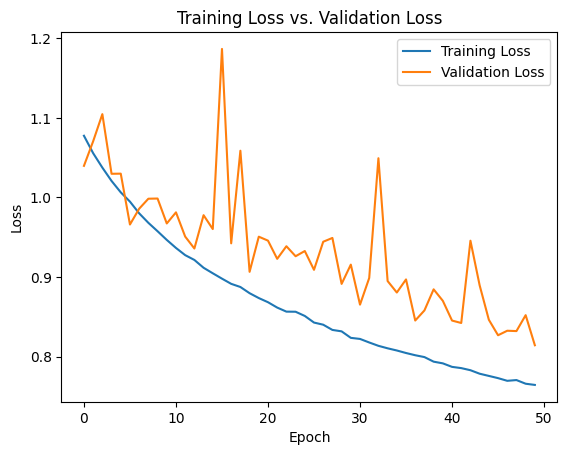

In [111]:
# Plot the training and validation loss
plt.plot(hist_cl_hi5_v1.history['loss'])
plt.plot(hist_cl_hi5_v1.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

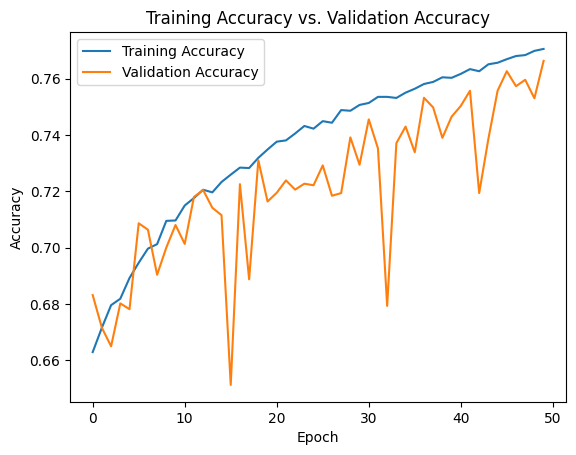

In [112]:
# Plot the training and validation accuracy
plt.plot(hist_cl_hi5_v1.history['accuracy'])
plt.plot(hist_cl_hi5_v1.history['val_accuracy'])
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

The Model was created with 1 Input layer, 2 dense layers & 1 output later. Dense layer has actiavtion function as relu, output function used softmax as activation function:
1. In the first model training (hist_cl_hi5), batch size used was 20 with 50 epochs. Accuracy achieved was 67% which is at par with training accuracy of 68%

2. In the second model training (hist_cl_hi5_v1), batch size was reduced to 10 with 50 epochs. The accuracy has improved to about 76% which is close to training accuracy of 78%. However, this training result has more noise compared ot the earlier one. The earlier trained model is comparitively better. 